#CDIA:::AAI - Blind Search Methods -- BFS-DFS-DLS-IDS

Ibai Laña

In this notebook we will write a generalized version of BFS and BFS_g that can work with any problem once it is formulated. Then, the key of the solution will be generating proper problem formulations. Some modifications will be made to methods developed in previous work.

Besides, we will introduce modifications to BFS and BSF_g to obtain

*   DFS and DFS_g
*   DLS and DLS_g
*   IDS and IDS_g

## Frontier operation Functions
As we have seen, the frontier is encoded as a FIFO queue, that can be represented in Python as a simple list from where we can add or remove elements.

For DFS, a LIFO stack is the solution, and it will operate similarly but taking the last value instead of the first. As this functions are basically a line, we will include them in the main function

for pushing:
```
 frontier.append(state)
```

for pulling from FIFO queue:
```
state = frontier[0]
frontier = frontier[1:]
```

for popping from LIFO stack:
```
state = frontier[-1]
frontier = frontier[:-1]
```


## PROBLEM FORMULATION
The problem was formulated as a Python class, with the actions, restrictions and functions integrated and always the same name, so they can be re-coded for different problems and the search methods work the same. We start creating the class for River crossing problem. Creating other problems will only require changing some parts of this class.

In [ ]:
class Problem:
    #attributes of the class are empty
    name = ""
    initial_state = {}
    goal_state = {}
    actions = []
  #other attributes could include costs of actions required for other problems.

    def __init__(self): ## init method is the constructor.  When an object is created, this routine is run
  ## in River corssing problem all class attributes are default. But some problems could have parameters
  ## that are used to initialize, for example the initial state.
        self.name ="RiverCrossingProblem"
        self.initial_state = {"Farmer":"L","Wolf":"L","Goat":"L","Cabbage":"L"} ### for this problem, this
        self.goal_state = {"Farmer":"R","Wolf":"R","Goat":"R","Cabbage":"R"} ## for this problem this is not necessary, as we will have a method to define if the goal state has arrived
        self.actions = ["Farmer","Wolf", "Goat", "Cabbage"]


  # this function should exist for all problems, but its internal operation should be changed per problem
    def is_final_state(self, state):



  # this function is only required for River Crossing problem, other problems could have other functions to assist changing states
    def change_element_status (self, element, state):

  ## MOve function is replaced by two functions:
  # "is_applicable", that checks if a new state is possible (it was called check_possible_state)
  # "effect", that applies the action if it is possible.

    # this function should exist for all problems, but its internal operation should be changed per problem
    def is_applicable (self, state):
        #in River crossing, we just check that impossible states are not produced

    # this function should exist for all problems, but its internal operation should be changed per problem
    # in this case, the applicability is checked in the expansion function, so the effect of a change is always produced
    def effect (self, state, action):
        # in River crossing, this function was "move" function

# we also need cost of an action adn evaluation of the state, for other problems.
# for River crossing they are defined and return just 1
    def get_cost(self, action, state):
        return 1

    def get_evaluation (self, state):
        return 1


Now we can create objects of the class Problem that will have all of the methods and attributes to use.

In [ ]:
riverproblem = Problem()
print(riverproblem.initial_state)
riverproblem.is_applicable({"Farmer":"R","Wolf":"R","Goat":"L","Cabbage":"L"})

In [ ]:
new_state  = riverproblem.effect({"Farmer":"L","Wolf":"R","Goat":"L","Cabbage":"L"}, "Cabbage")
riverproblem.is_applicable(new_state)
print (new_state)

In [ ]:
#moving a forbidden element
new_state  = riverproblem.effect({"Farmer":"L","Wolf":"R","Goat":"L","Cabbage":"L"}, "Wolf")
print (new_state)
riverproblem.is_applicable(new_state)

In [ ]:
#moving to an impossible state
new_state  = riverproblem.effect({"Farmer":"L","Wolf":"L","Goat":"L","Cabbage":"L"}, "Cabbage")
print ( new_state)
riverproblem.is_applicable(new_state)

# Generalized Expansion Function
The function is similar but it does not include the particular actions of River Crossing problems, but calls to the problem functions, that will be specific for each problem

It receives the problem, with the functions and actions, and a NODE, which includes the following:

* state	(current state)
* parent node (parent node, starts with empty)
* actions (list of actions that led here)
* cost (starting in 0)
* depth (starting in 0)
* evaluation

these fields are not necessary for River Crossing problem but we will use them for other problems


In [ ]:
# instead of updating the frontier, the expand function only creates a list of child of possible nodes given a current node
# it does not receive states, but NODES, dictionaries that include other information besides state
def expand (node, problem):



# BFS - Breadth First Search

```
1. Make a node with the initial problem state
2. Insert node into the frontier data structure
3. WHILE final state not found AND frontier is not empty DO
  3.1 Remove first node from the frontier
  3.2 IF node contains final state THEN final state found
  3.3 IF node doesn’t contain final state THEN
     3.3.1 EXPAND node’s state
     3.3.2 Insert successor nodes into frontier
4. IF final state found THEN
  4.1  RETURN sequence of actions found
5. ELSE  “solution not found”
```

We are maintaing previous coding but generalized to new methods. Besides, we are creating a result dictionary that contains result info so we can use it later

In [ ]:
def BFS(problem):
    # result dictionary
    result = {"method":"BFS", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    problem = Problem()
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
    frontier = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1
    while len (frontier)>0: #if we have elements in the frontier...
         # 3.1. get first element of frontier and delete it
        node = frontier[0]


        frontier = frontier[1:]
        # 3.2 check if it is final state:
        if problem.is_final_state (node["state"]):
            result["status"]="Solution Found."
            break #we end while. state will remain this last state computed, and sequence of actions will have all states.

        # 3.3 if it is not final, expand and add to the frontier
        new_nodes = expand(node, problem)
        for n in new_nodes:
            frontier.append(n)

        # we compute the maximum size of frontier: the previous one or the current if it is bigger
        result["max_frontier"]=max(result["max_frontier"],len (frontier))
         # we compute the maximum depth: the previous one or the current if it is bigger
        result["max_depth"]=max(result["max_depth"], node["depth"])
         # we update the iterations count
        result["iterations"]= iterations

        iterations+=1
      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)




In [ ]:
problem=Problem()
problem.initial_state
result = BFS(problem)
print (result)

# BFS-g: Breadth First Search with Graphs
Same as BFS but with the expanded nodes list

In [ ]:
def BFS_g(problem):
    # result dictionary
    result = {"method":"BFS_g", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    problem = Problem()
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
    frontier = []

    ####
    expanded = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1
    while len (frontier)>0: #if we have elements in the frontier...
         # 3.1. get first element of frontier and delete it
        node = frontier[0]
        frontier = frontier[1:]

        #add to expanded--> we add the state, as the rest of fields will be different
        expanded.append(node["state"])

        # 3.2 check if it is final state:
        if problem.is_final_state (node["state"]):
            result["status"]="Solution Found."
            break #we end while. state will remain this last state computed, and sequence of actions will have all states.

        # 3.3 if it is not final, expand and add to the frontier
        new_nodes = expand(node, problem)
        for n in new_nodes:
            # check if it is expanded before adding to frontier
            if n["state"] not in expanded:
                frontier.append(n)

        # we compute the maximum size of frontier: the previous one or the current if it is bigger
        result["max_frontier"]=max(result["max_frontier"],len (frontier))
         # we compute the maximum depth: the previous one or the current if it is bigger
        result["max_depth"]=max(result["max_depth"], node["depth"])
         # we update the iterations count
        result["iterations"]= iterations

        iterations+=1
      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)

In [ ]:
problem=Problem()
problem.initial_state
result = BFS_g(problem)
print (result)

# DFS: Depth First Search
The only change with respect to BFS is in the step 3.1, where we take out of the frontier the last node

In [ ]:
def DFS(problem):
# result dictionary
    result = {"method":"DFS", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    problem = Problem()
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
    frontier = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier


    result["final_state"] = node
    return(result)




In [ ]:
problem=Problem()
problem.initial_state
result = DFS(problem)
print (result)

**We have an infinite loop here!**

Why?

In principle, the method should work going throuhg the nodes down and be much quicker than BFS. The thing here is the expansion on the "center" side of the tree is the one that leads to a solution. But the stack implementation leads to exploring the "right" branch, leading to an infinite loop. We could simply change the statemente of the problem and the order of actions to have a solution that works.

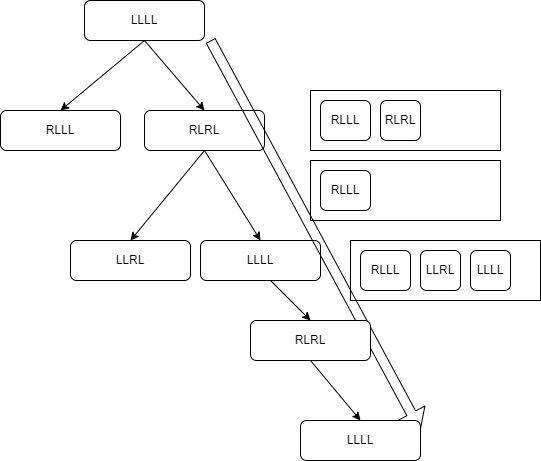

# DFS_g - Depth First Search with Graph Search
The only change with respect to BFS.gs is in the step 3.1, where we take out of the frontier the last node



In [ ]:
def DFS_g(problem):
 # result dictionary
    result = {"method":"DFS_g", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    problem = Problem()
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
    frontier = []

    ####
    expanded = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier

      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)

In [ ]:
problem=Problem()
problem.initial_state
result = DFS_g(problem)
print (result)

# DLS - Depth Limited Search
The only change with respect to DFS is the check for not violating the limits before including a node in the frontier

In [ ]:
def DLS(problem, depth_limit):
  # result dictionary
    result = {"method":"DFS", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    problem = Problem()
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
    frontier = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1
    while len (frontier)>0: #if we have elements in the frontier...
         # 3.1. get first element of frontier and delete it

        # 3.2 check if it is final state:


      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)





In [ ]:
problem=Problem()
result = DLS(problem, 5)
print (result)


In [ ]:
result = DLS(problem, 7)
print (result)

Just by adding the limit we avoid the infinite loop situations. Besides, we can check where is the depth required to solve the problem, in this case with 6 is not enough, but 7 does the trick.

#DLS_g - Depth Limited Search with Graph Search
The only change with respect to DFS_g is the check for not violating the limit before including a node in the frontier

In [ ]:
def DLS_g(problem, depth_limit):
# result dictionary
    result = {"method":"DLS_g", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    problem = Problem()
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
    frontier = []
    expanded = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1
    while len (frontier)>0: #if we have elements in the frontier...
         # 3.1. get first element of frontier and delete it


        # 3.2 check if it is final state:
     # 3.3 if it is not final, expand and add to the frontier

      #loop keeps running until no more nodes available or final state obtained

    result["final_state"] = node
    return(result)





In [ ]:
problem=Problem()
result = DLS_g(problem, 7)
print (result)


# IDS - Iterative Deepening Search
The difference with DLS is in the increase of the limit once the frontier get empty, and the increase of the limit.
We will have to change the while condition in order to control the ending of the frontier. Now if the frontier is empty it can be the end of the process or not, depending on the depth

In [ ]:
def IDS(problem, depth_limit):
# result dictionary
    result = {"method":"IDS", "final_state":[], "status":"No nodes in the frontier. No solution possible.",
             "max_frontier":0, "max_depth":0, "iterations":0}

    # 1. problem definition
    problem = Problem()
    initial_node={"state":problem.initial_state, "parent_node":{}, "actions":[], "cost":0, "depth":0, "evaluation":1}
    frontier = []

     # 2. add node to frontier
    frontier.append(initial_node)

    # 3. start exploring and expanding the frontier
    iterations=1
    current_depth = 1



    result["final_state"] = node
    return(result)





In [ ]:
result = IDS(problem, 7)
print (result)

# IDS_g - Iterative Deepening Search with Graph Search

The difference with DLS_g is in the increase of the limit once the frontier get empty, and the increase of the limit.

In [ ]:
def IDS_g(problem, depth_limit, iteration_limit):


In [ ]:
result = IDS_g(problem, 28, 300)
print (result)